In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv("Clustering_Mall_Customers.csv")

In [36]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
from sklearn.preprocessing import StandardScaler ,OneHotEncoder

In [38]:
df.drop(['CustomerID'],axis =1)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [39]:
df['Genre'] = df['Genre'].map({"Male": 0,"Female": 1})
sc = StandardScaler()
df_sc = sc.fit_transform(df)


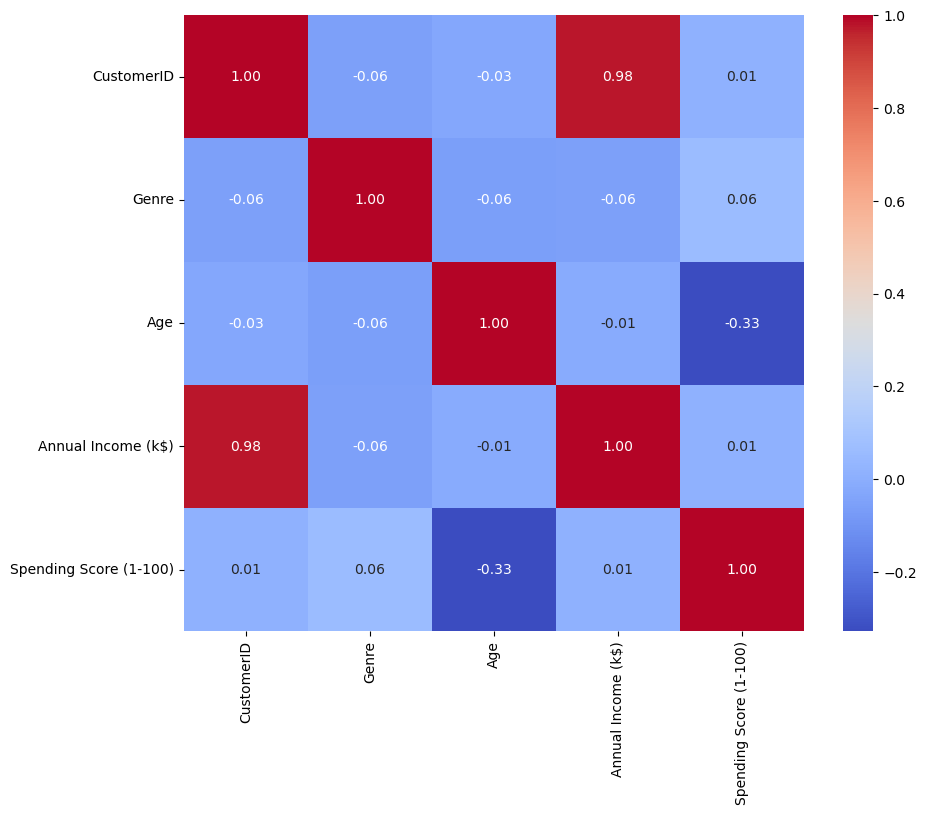

In [40]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True ,cmap='coolwarm',fmt=".2f" )
plt.show()

In [41]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score


In [42]:
wcss =[]
silhouette_scores =[]

k_range =range(2,11)

for k in k_range:
    kmeans = KMeans( n_clusters=k,init='k-means++', n_init='auto' , random_state=None,copy_x=True,  algorithm='lloyd')
    kmeans.fit(df_sc)
    wcss.append(kmeans.inertia_)
    cluster_labels = kmeans.predict(df_sc)
    silhouette_avg = silhouette_score(df_sc, cluster_labels)
    silhouette_scores.append(silhouette_avg)
print("WCSS values:", wcss)
print("Silhouette Scores:", silhouette_scores)    

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

WCSS values: [715.2750473761118, 573.9879171814764, 465.1577929431602, 404.6481832764364, 353.67716323818263, 302.56111998034044, 266.30721343283653, 240.9170768688907, 205.9886135259308]
Silhouette Scores: [np.float64(0.25418996301027574), np.float64(0.2533034505489172), np.float64(0.2885504344569386), np.float64(0.28733914723855114), np.float64(0.3012259922465579), np.float64(0.3437843192301876), np.float64(0.34047596142417474), np.float64(0.35944985313359296), np.float64(0.3892836798382151)]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

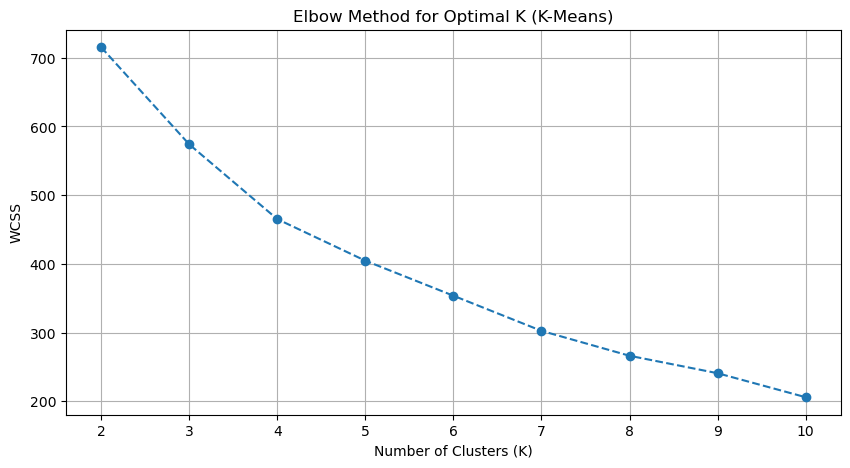

In [43]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K (K-Means)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

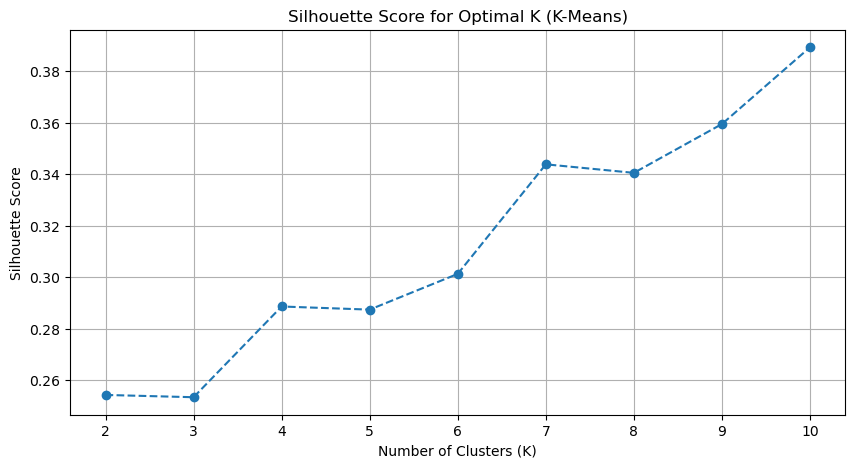

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K (K-Means)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [51]:
from sklearn.cluster import KMeans

# Optimal number of clusters identified from the elbow method and silhouette score analysis
# Based on the plots, K=6 appears to be a reasonable choice.
k_optimal = 6

# Initialize KMeans model with the optimal K
kmeans_model = KMeans(n_clusters=k_optimal, init='k-means++', random_state=42, n_init=10)

# Fit the KMeans model and get cluster labels
kmeans_labels = kmeans_model.fit_predict(df)

# Add the cluster labels to the preprocessed DataFrame
df['KMeans_Cluster'] = kmeans_labels

print("K-Means clustering applied successfully. First 5 rows with new cluster labels:")
print(df.head())

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K-Means clustering applied successfully. First 5 rows with new cluster labels:
   CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1      0   19                  15                      39   
1           2      0   21                  15                      81   
2           3      1   20                  16                       6   
3           4      1   23                  16                      77   
4           5      1   31                  17                      40   

   KMeans_Cluster  
0               1  
1               3  
2               1  
3               3  
4               1  


In [55]:
from sklearn.cluster import AgglomerativeClustering

# Optimal number of clusters from K-Means analysis
k_optimal = 6

# Initialize AgglomerativeClustering model
hierarchical_model = AgglomerativeClustering(n_clusters=k_optimal, metric='euclidean', linkage='ward')

# Fit the model and get cluster labels
hierarchical_labels = hierarchical_model.fit_predict(df.drop(columns=['KMeans_Cluster']))

# Add the cluster labels to the preprocessed DataFrame
df['Hierarchical_Cluster'] = hierarchical_labels

print("Hierarchical clustering applied successfully. First 5 rows with new cluster labels:")
print(df.head())

Hierarchical clustering applied successfully. First 5 rows with new cluster labels:
   CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1      0   19                  15                      39   
1           2      0   21                  15                      81   
2           3      1   20                  16                       6   
3           4      1   23                  16                      77   
4           5      1   31                  17                      40   

   KMeans_Cluster  Hierarchical_Cluster  
0               1                     5  
1               3                     4  
2               1                     5  
3               3                     4  
4               1                     5  


In [57]:
df_viz = df[['Annual Income (k$)', 'Spending Score (1-100)']].copy()
df_viz['KMeans_Cluster'] = df['KMeans_Cluster']
df_viz['Hierarchical_Cluster'] = df['Hierarchical_Cluster']

print("DataFrame for visualization created. First 5 rows:")
print(df_viz.head())

DataFrame for visualization created. First 5 rows:
   Annual Income (k$)  Spending Score (1-100)  KMeans_Cluster  \
0                  15                      39               1   
1                  15                      81               3   
2                  16                       6               1   
3                  16                      77               3   
4                  17                      40               1   

   Hierarchical_Cluster  
0                     5  
1                     4  
2                     5  
3                     4  
4                     5  


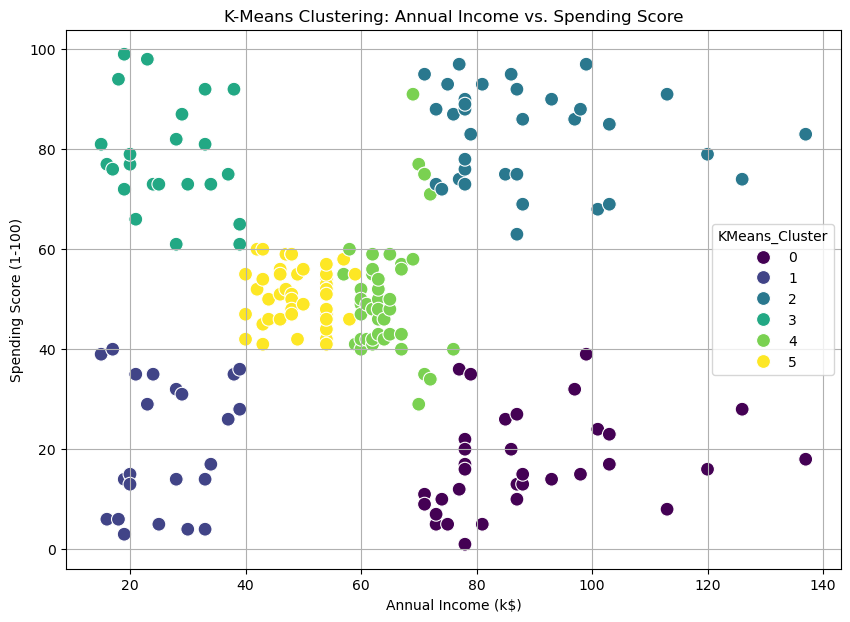

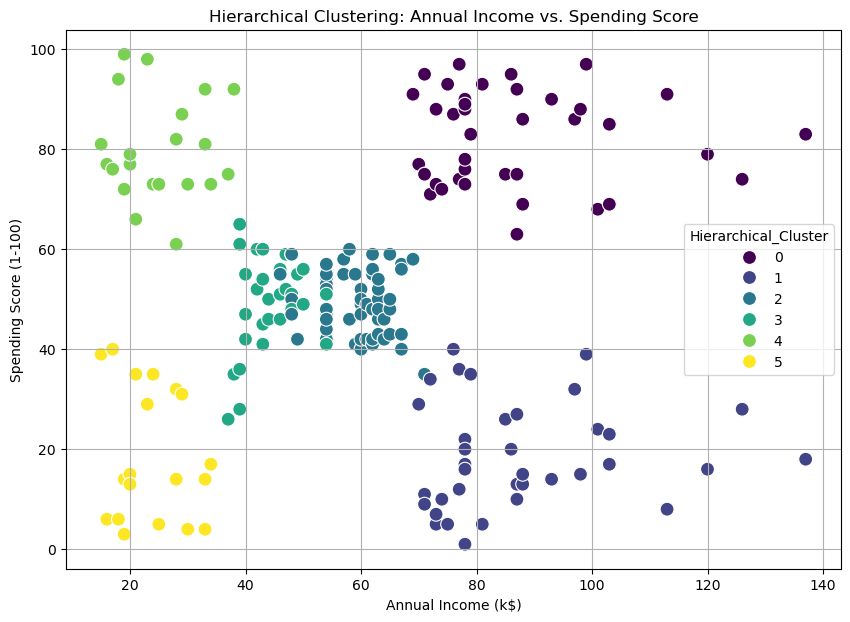

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualize K-Means Clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='KMeans_Cluster',
    data=df_viz,
    palette='viridis',
    s=100, # size of points
    legend='full'
)
plt.title('K-Means Clustering: Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

# 2. Visualize Hierarchical Clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Hierarchical_Cluster',
    data=df_viz,
    palette='viridis',
    s=100, # size of points
    legend='full'
)
plt.title('Hierarchical Clustering: Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()


In [59]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score for K-Means
silhouette_kmeans = silhouette_score(df.drop(columns=['KMeans_Cluster', 'Hierarchical_Cluster']), df['KMeans_Cluster'])

print(f"K-Means Silhouette Score: {silhouette_kmeans}")

K-Means Silhouette Score: 0.41012431037453495


In [60]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score for Hierarchical Clustering
silhouette_hierarchical = silhouette_score(df.drop(columns=['KMeans_Cluster', 'Hierarchical_Cluster']), df['Hierarchical_Cluster'])

print(f"Hierarchical Clustering Silhouette Score: {silhouette_hierarchical}")

Hierarchical Clustering Silhouette Score: 0.4011751415546014


In [61]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# 1. Define a range of K values to evaluate
k_range_robustness = range(2, 11) # Same range as before, or adjust if needed

# 2. Create an empty list to store the optimal K values found for each subset
optimal_k_subsets = []

# Number of iterations for generating different data subsets
num_iterations = 3

print(f"Starting robustness check with {num_iterations} data subsets...")

Starting robustness check with 3 data subsets...


In [64]:
for i in range(num_iterations):
    # a. Randomly sample a fraction of the df_preprocessed DataFrame (e.g., 70%)
    # Ensure a different random_state is used for each sample to get varied subsets
    subset_df = df.sample(frac=0.7, random_state=42 + i)

    # b. For the current data subset, initialize empty lists for WCSS and Silhouette Scores
    subset_wcss = []
    subset_silhouette_scores = []

    # c. Loop through the defined range of K values
    for k in k_range_robustness:
        # i. Initialize a KMeans model
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)

        # ii. Fit the KMeans model to the current data subset
        kmeans.fit(subset_df.drop(columns=['KMeans_Cluster', 'Hierarchical_Cluster'], errors='ignore'))

        # iii. Append the model's inertia_ (WCSS) to the WCSS list
        subset_wcss.append(kmeans.inertia_)

        # iv. Predict cluster labels
        cluster_labels_subset = kmeans.predict(subset_df.drop(columns=['KMeans_Cluster', 'Hierarchical_Cluster'], errors='ignore'))

        # v. Calculate the Silhouette Score and append to the list
        silhouette_avg_subset = silhouette_score(subset_df.drop(columns=['KMeans_Cluster', 'Hierarchical_Cluster'], errors='ignore'), cluster_labels_subset)
        subset_silhouette_scores.append(silhouette_avg_subset)

    # d. Determine the optimal K for the current data subset by finding the K value that corresponds to the highest Silhouette Score.
    # Handle cases where subset_silhouette_scores might be empty or all values are the same (though unlikely with range(2,11))
    if subset_silhouette_scores:
        optimal_k_for_subset_idx = np.argmax(subset_silhouette_scores)
        optimal_k_for_subset = k_range_robustness[optimal_k_for_subset_idx]
        max_silhouette_score = subset_silhouette_scores[optimal_k_for_subset_idx]
    else:
        optimal_k_for_subset = None
        max_silhouette_score = None

    # e. Add the identified optimal K for this subset to the list created in step 2.
    optimal_k_subsets.append(optimal_k_for_subset)

    # f. Print the optimal K found for the current subset and its corresponding Silhouette Score.
    print(f"Iteration {i+1}: Optimal K for subset = {optimal_k_for_subset} with Silhouette Score = {max_silhouette_score:.3f}")

print(f"\nOptimal K values found for all subsets: {optimal_k_subsets}")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

Iteration 1: Optimal K for subset = 2 with Silhouette Score = 0.488


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

Iteration 2: Optimal K for subset = 2 with Silhouette Score = 0.481


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

Iteration 3: Optimal K for subset = 2 with Silhouette Score = 0.481

Optimal K values found for all subsets: [2, 2, 2, 2, 2, 2]
